In [97]:
print('olá mundo')

olá mundo


In [101]:
a = 2
print(type(a))
a = 'andre'
print(type(a))
a = '2'
b = '3'
print(a+b)
a = 2
b = 3.4
print(a+b)

a = '2'
b = 3
print(a+b)


<class 'int'>
<class 'str'>
23
5.4


TypeError: can only concatenate str (not "int") to str

In [102]:
print('Você é ' + 3 * 'muito ' + 'legal!')

Você é muito muito muito legal!


In [103]:
lista = []

type(lista)

dir(lista)

lista = [1,5,'Ana', 'Bia']
lista.append('Guilherme')
print(lista)
lista[4]
lista[1:4]
lista[-1]

nova_lista = [0,1,2,3,4,5,6,7,8,9]
nova_lista[2:]
nova_lista[::2]

nome = 'André Insardi'

nome[2:5]
nome[::-1]

[1, 5, 'Ana', 'Bia', 'Guilherme']


'idrasnI érdnA'

In [104]:
lista2 = [1,5,'Ana', 'Guilherme', 3.14]

lista2.append('Andre')
lista2
lista2.insert(3, 'Mauricio')
lista2
lista2.index('Guilherme')

'Gabriel' in lista2 

lista2.append([3,5,'teste'])

for item in lista2:
    print(item)


print(lista2[7][2][3])

1
5
Ana
Mauricio
Guilherme
3.14
Andre
[3, 5, 'teste']
t


In [105]:
lista = [1,2,3,4,5]

def soma (x):
    return x+1

list(map(lambda x: x+1, lista))

[2, 3, 4, 5, 6]

In [106]:
pessoa = {'nome': 'André Insardi', 'idade':35, 'cursos': ['Python', 'C#', 'Node'] }

pessoa['cursos'][1][0]

pessoa['nome']
pessoa['cursos'].append('React')
pessoa
pessoa.update({'idade':30})
pessoa
pessoa['idade']=35
pessoa.update({'sexo': 'M'})
pessoa
del pessoa['sexo']
pessoa

{'nome': 'André Insardi',
 'idade': 35,
 'cursos': ['Python', 'C#', 'Node', 'React']}

In [107]:
pessoa1 = {'nome': 'André', 'idade': 35, 'curso': ['Python', 'C#', 'Node JS'] }
pessoa2 = {'nome': 'Ana', 'idade': 25, 'curso': ['Python', 'Node JS'] }
pessoa3 = {'nome': 'Guilherme', 'idade': 27, 'curso': [ 'C#', 'Node JS'] }

list_pessoa =[]

list_pessoa.append(pessoa1)
list_pessoa.append(pessoa2)
list_pessoa.append(pessoa3)

list_pessoa

for pessoa in list_pessoa:
    print(pessoa['nome']) 
    for curso in pessoa['curso']:
        print(curso)

André
Python
C#
Node JS
Ana
Python
Node JS
Guilherme
C#
Node JS


# Regressão Linear

In [108]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('Arquivo-Treino.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

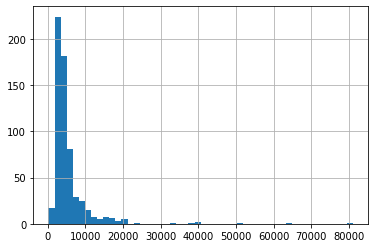

In [111]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

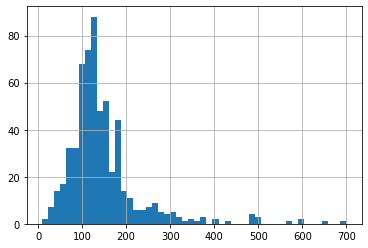

In [74]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

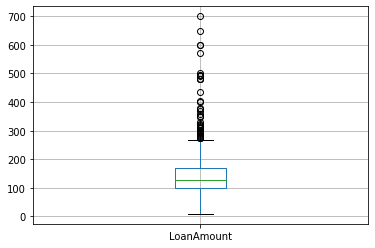

In [75]:
df.boxplot(column='LoanAmount')

<AxesSubplot:xlabel='Credit_History'>

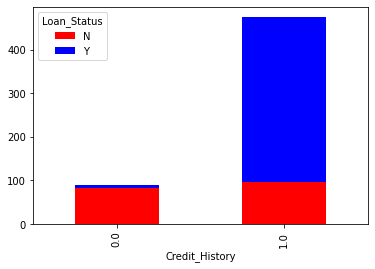

In [76]:
temp = pd.crosstab(df['Credit_History'], df['Loan_Status'])

temp.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

In [112]:
df.apply(lambda x: sum(x.isnull()), axis=0 )

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna('Yes', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(0, inplace=True)

df.apply(lambda x: sum(x.isnull()), axis=0 )

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()

for i in var_mod:
    df[i] = le.fit_transform(df[i])

df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [115]:
df_x = df.drop(axis=1, columns=['Loan_ID', 'LoanAmount', 'Loan_Status'])
df_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,360.0,1.0,2


In [116]:
df_y = df[['LoanAmount']]
df_y

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=4)

In [118]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [119]:
print(model.intercept_)
print(model.coef_)

[49.32781462]
[[ 1.54478932e+00  1.62467738e+01  6.16638939e+00 -2.18183623e+01
  -2.18855278e-01  7.40235037e-03  5.53342455e-03  1.11670133e-01
  -5.32823782e+00  8.75093651e-01]]


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = model.predict(X_train)

print(mean_absolute_error(y_train, y_predict))
print(mean_squared_error(y_train, y_predict))
print(mean_absolute_error(y_train, y_predict)/y_train.mean())



42.41683343759262
4656.613757913373
LoanAmount    0.287327
dtype: float64


In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_predict = model.predict(X_test)

print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict)/y_test.mean())

37.610709312222205
3083.6415675151356
LoanAmount    0.261916
dtype: float64


# Regressão Logística

In [122]:
df_x2 = df.drop(axis=1, columns=['Loan_ID', 'Loan_Status'])
df_x2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [125]:
df_y2 = df[['Loan_Status']]
df_y2

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x2, df_y2, test_size=0.3, random_state=4)

In [131]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression().fit(X_train, y_train)

C:\Users\andre\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict_2 = model_2.predict(X_train)

print(accuracy_score(y_train, y_predict_2))
print(confusion_matrix(y_train, y_predict_2))

0.7762237762237763
[[ 61  70]
 [ 26 272]]


In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict_2 = model_2.predict(X_test)

print(accuracy_score(y_test, y_predict_2))
print(confusion_matrix(y_test, y_predict_2))

0.7675675675675676
[[ 26  35]
 [  8 116]]


# KNN

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [140]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [141]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = knn.predict(X_train)

print(accuracy_score(y_train, y_predict))
print(confusion_matrix(y_train, y_predict))

0.9833333333333333
[[34  0  0]
 [ 0 44  1]
 [ 0  1 40]]


In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_predict = knn.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.9666666666666667
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix

k_range = range (1, 16)
scores = {}
scores_list = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(scores[k])


(0.8, 1.0)

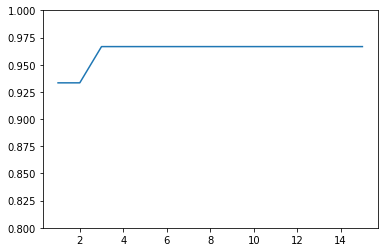

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores_list)
plt.ylim(0.8, 1)

# Arvore de Decisão

In [162]:
from sklearn import tree
import graphviz

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [163]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

In [164]:
y_predict = clf.predict(X_train)

print(accuracy_score(y_train, y_predict ))
print(confusion_matrix(y_train, y_predict ))

1.0
[[34  0  0]
 [ 0 45  0]
 [ 0  0 41]]


In [165]:
y_predict = clf.predict(X_test)

print(accuracy_score(y_test, y_predict ))
print(confusion_matrix(y_test, y_predict ))

0.9666666666666667
[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]
